In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/cleaned_playstore (1).csv')

In [ ]:
data.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [ ]:
df_installs_sum = data.groupby("Category")["Installs"].agg("sum")
sum_installs = pd.DataFrame( df_installs_sum )
sum_installs['Category'] = sum_installs.index
sum_installs.reset_index(inplace=True, drop=True)

<Figure size 432x288 with 0 Axes>

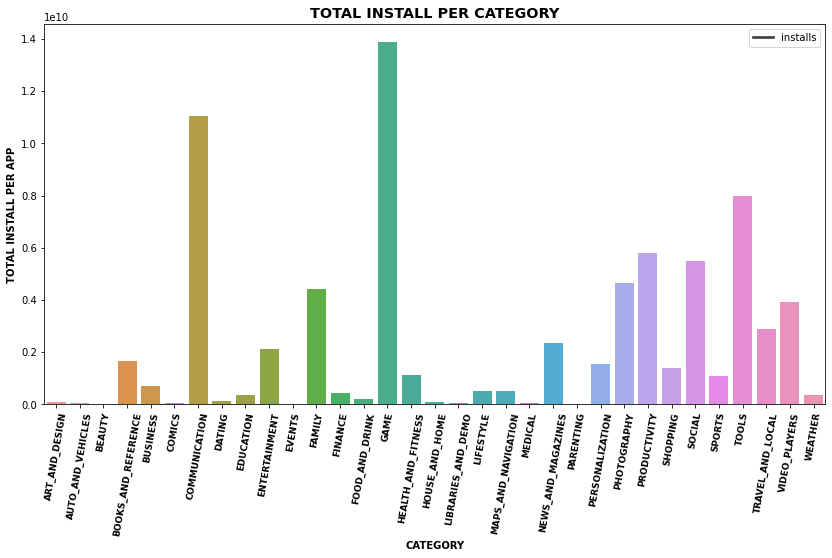

In [ ]:

#Qn2.plot a bar chart for categories with the total number of installing numbers in each category 

plt.figure()
f, ax = plt.subplots(figsize=(14,7))
g = sns.barplot (x= 'Category', y='Installs', data=sum_installs)
plt.legend(['installs'])
plt.title("TOTAL INSTALL PER CATEGORY",weight = 'bold', fontsize= 'x-large')
plt.xlabel('CATEGORY', weight = 'bold')
plt.ylabel('TOTAL INSTALL PER APP', weight = 'bold')
g.set_xticklabels(labels = sum_installs['Category'], rotation=80, fontsize = 9, weight = 'bold')
plt.show(g)

In [ ]:
df_price_sum = data.groupby("Category")["Price"].agg("sum")
sum_price = pd.DataFrame( df_price_sum )
sum_price['Category'] = sum_price.index
sum_price.reset_index(inplace=True, drop=True)

<Figure size 432x288 with 0 Axes>

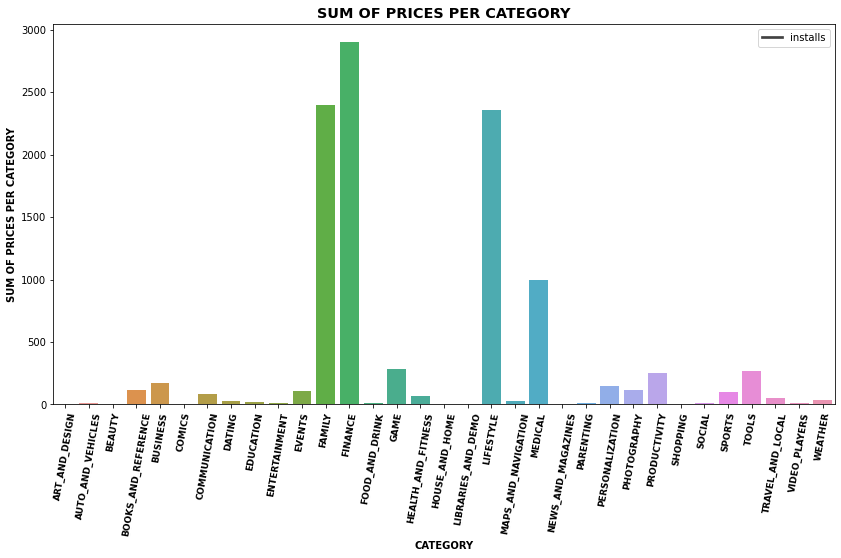

In [ ]:
#Qn2.plot a bar chart for categories with the total number of installing numbers in each category 

plt.figure()
f, ax = plt.subplots(figsize=(14,7))
f = sns.barplot (x= 'Category', y='Price', data=sum_price)

plt.legend(['installs'])
plt.title("SUM OF PRICES PER CATEGORY",weight = 'bold', fontsize= 'x-large')
plt.xlabel('CATEGORY', weight = 'bold')
plt.ylabel('SUM OF PRICES PER CATEGORY', weight = 'bold')
f.set_xticklabels(labels = sum_price['Category'], rotation=80, fontsize = 9, weight = 'bold')
plt.show(f)

In [ ]:
sum_price['Value'] = sum_price['Price']
sum_installs['Value'] = sum_installs['Installs']

In [ ]:
Values = sum_price.Value
Values = (Values - Values.min())/(Values.max()-Values.min())
sum_price['Normal_Value'] = Values

In [ ]:
Values = sum_installs.Value
Values = (Values - Values.min())/(Values.max()-Values.min())
sum_installs['Normal_Value'] = Values

In [ ]:
concatenated = pd.concat([sum_price.assign(dataset='Price'), sum_installs.assign(dataset='Installs')])

In [ ]:
data_price_installs = concatenated[['Category','Normal_Value','dataset']]

In [ ]:
data_price_installs

,Category,Normal_Value,dataset
0,ART_AND_DESIGN,0.002058,Price
1,AUTO_AND_VEHICLES,0.004643,Price
2,BEAUTY,0.000000,Price
3,BOOKS_AND_REFERENCE,0.041288,Price
4,BUSINESS,0.060428,Price
...,...,...,...
28,SPORTS,0.077942,Installs
29,TOOLS,0.576053,Installs
30,TRAVEL_AND_LOCAL,0.207670,Installs
31,VIDEO_PLAYERS,0.282114,Installs


<Figure size 432x288 with 0 Axes>

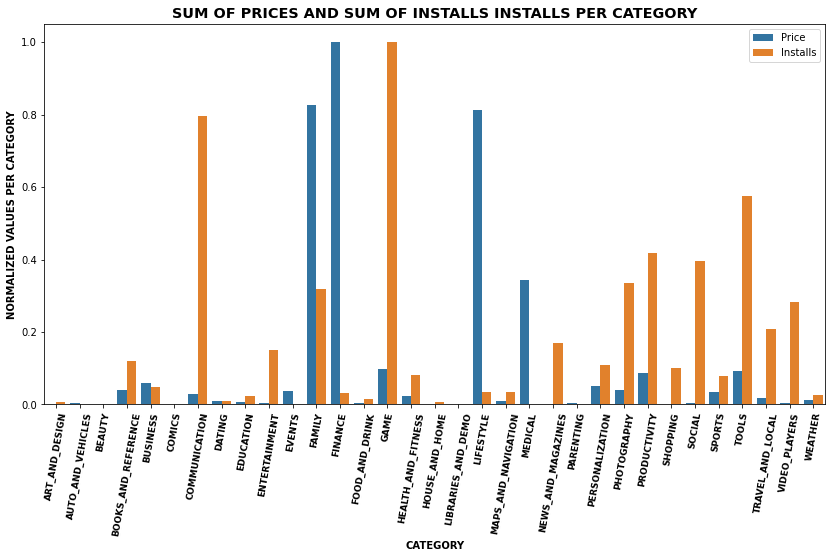

In [ ]:
#Qn2.plot a bar chart for categories with the total number of installing numbers in each category 

plt.figure()
f, ax = plt.subplots(figsize=(14,7))
f = sns.barplot (x= 'Category', y='Normal_Value', hue = 'dataset', data=data_price_installs)

plt.legend()
plt.title("SUM OF PRICES AND SUM OF INSTALLS INSTALLS PER CATEGORY",weight = 'bold', fontsize= 'x-large')
plt.xlabel('CATEGORY', weight = 'bold')
plt.ylabel('NORMALIZED VALUES PER CATEGORY', weight = 'bold')
f.set_xticklabels(labels = sum_price['Category'], rotation=80, fontsize = 9, weight = 'bold')
plt.show(f)

In [ ]:
#Week3  Task1
profit = data.Installs * data. Price

In [ ]:
data['Profit'] = profit

In [ ]:
sum_profit = data.groupby('Category')['Profit'].agg('sum')
sum_profit = pd.DataFrame(sum_profit)
sum_profit['Category'] = sum_profit.index
sum_profit.reset_index(drop= True, inplace = True)
sum_profit

,Profit,Category
0,3.184000e+04,ART_AND_DESIGN
1,1.001485e+05,AUTO_AND_VEHICLES
2,0.000000e+00,BEAUTY
3,9.022674e+04,BOOKS_AND_REFERENCE
4,1.050543e+06,BUSINESS
5,0.000000e+00,COMICS
6,4.247365e+06,COMMUNICATION
7,4.846150e+04,DATING
8,2.403980e+06,EDUCATION
9,7.980000e+05,ENTERTAINMENT


<Figure size 432x288 with 0 Axes>

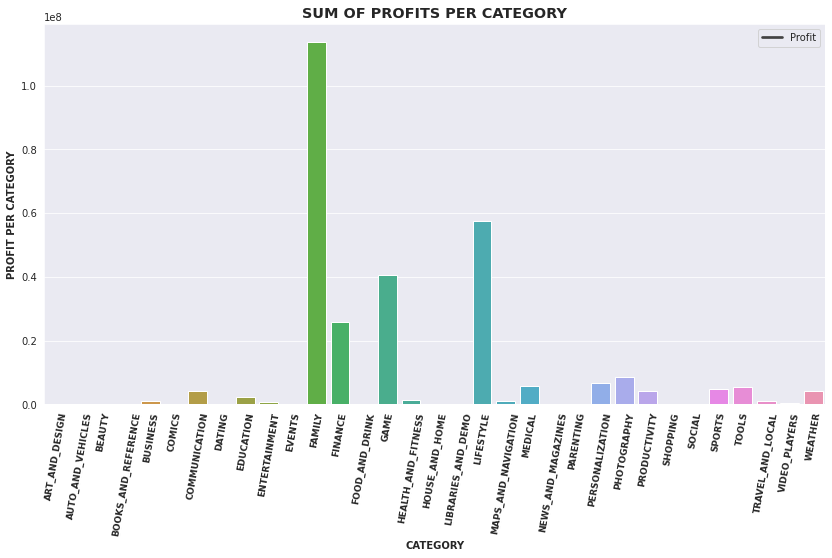

In [ ]:
plt.figure()
f, ax = plt.subplots(figsize=(14,7))
f = sns.barplot (x= 'Category', y='Profit',  data=sum_profit)

plt.legend(['Profit'])
plt.title("SUM OF PROFITS PER CATEGORY",weight = 'bold', fontsize= 'x-large')
plt.xlabel('CATEGORY', weight = 'bold')
plt.ylabel('PROFIT PER CATEGORY', weight = 'bold')
f.set_xticklabels(labels = sum_profit['Category'], rotation=80, fontsize = 9, weight = 'bold')
plt.show(f)

In [ ]:
## Week3 Task3

test = data.groupby(['Category','Type'])['Installs'].nlargest(5)
test = pd.DataFrame(test)
test

Installs
Category       Type                 
ART_AND_DESIGN Free 3     50000000.0
                    12    10000000.0
                    19    10000000.0
                    42    10000000.0
                    45    10000000.0
...                              ...
WEATHER        Paid 3274    500000.0
                    2901    100000.0
                    4019    100000.0
                    7793    100000.0
                    4012     10000.0

[284 rows x 1 columns]

In [ ]:
def funct_group (x):
  return ''.join( x [:2] )

def funct_type (x):
  return ''.join( x [1] )

def funct_categ (x):
  return ''.join( x [0] )

def funct_app_index (x):
  index =  x[2]
  return data.iloc[index,:]['App']

test['App']= test.index.map(funct_app_index)
test['Group'] = test.index.map(funct_group)
test['Type'] = test.index.map(funct_type)
test['Category'] = test.index.map(funct_categ)

In [ ]:
test

Installs  \
Category       Type                    
ART_AND_DESIGN Free 3     50000000.0   
                    12    10000000.0   
                    19    10000000.0   
                    42    10000000.0   
                    45    10000000.0   
...                              ...   
WEATHER        Paid 3274    500000.0   
                    2901    100000.0   
                    4019    100000.0   
                    7793    100000.0   
                    4012     10000.0   

                                                                        App  \
Category       Type                                                           
ART_AND_DESIGN Free 3                                 Sketch - Draw & Paint   
                    12                       Tattoo Name On My Photo Editor   
                    19                                         ibis Paint X   
                    42                           Textgram - write on photos   
                    45    Canva: Poster, banner, card maker & graphic de...   
...                                                                     ...   
WEATHER        Paid 3274                                       Weather Live   
                    2901                                   Weather Live Pro   
                    4019                      Weather & Radar Pro - Ad-Free   
                    7793                               Weather Forecast Pro   
                    4012                 MyRadar NOAA Weather Radar Ad Free   

                                       Group  Type        Category  
Category       Type                                                 
ART_AND_DESIGN Free 3     ART_AND_DESIGNFree  Free  ART_AND_DESIGN  
                    12    ART_AND_DESIGNFree  Free  ART_AND_DESIGN  
                    19    ART_AND_DESIGNFree  Free  ART_AND_DESIGN  
                    42    ART_AND_DESIGNFree  Free  ART_AND_DESIGN  
                    45    ART_AND_DESIGNFree  Free  ART_AND_DESIGN  
...                                      ...   ...             ...  
WEATHER        Paid 3274         WEATHERPaid  Paid         WEATHER  
                    2901         WEATHERPaid  Paid         WEATHER  
                    4019         WEATHERPaid  Paid         WEATHER  
                    7793         WEATHERPaid  Paid         WEATHER  
                    4012         WEATHERPaid  Paid         WEATHER  

[284 rows x 5 columns]

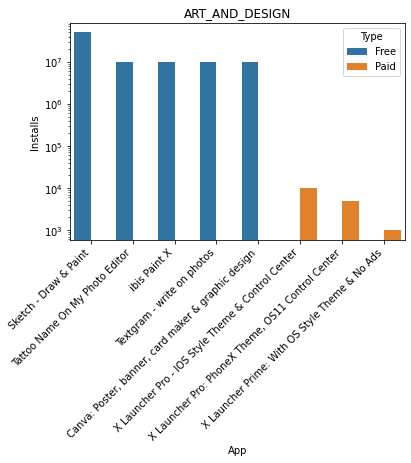

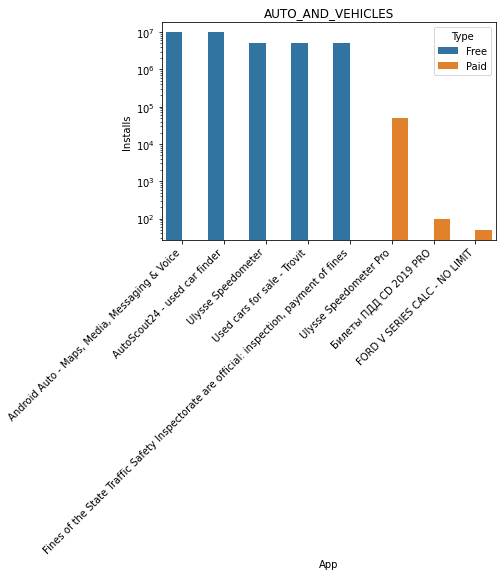

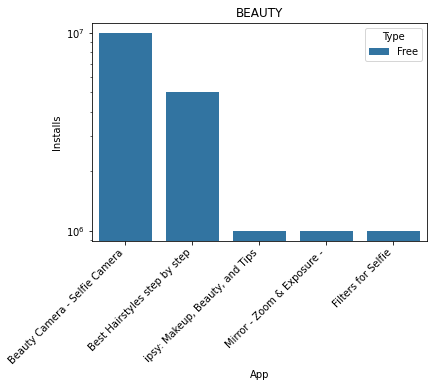

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


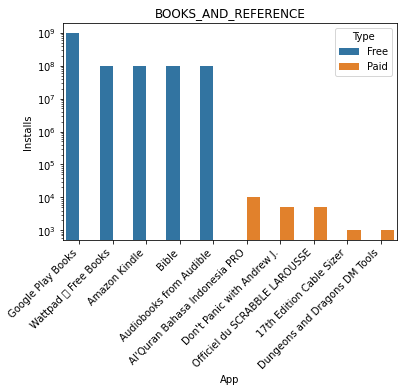

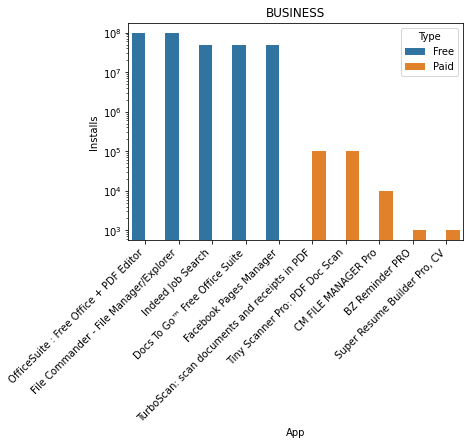

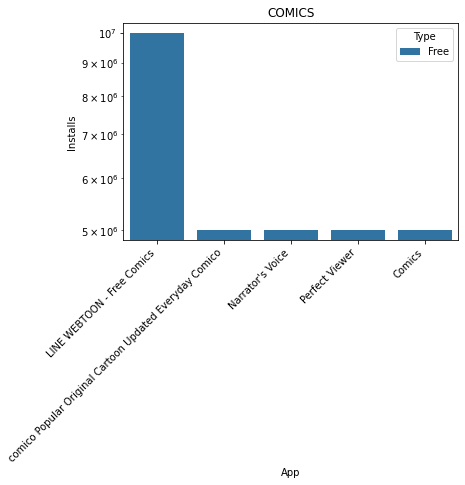

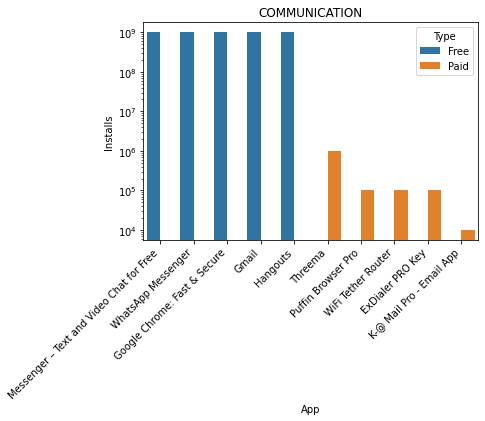

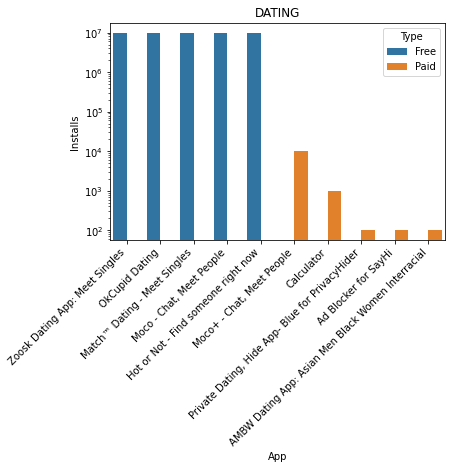

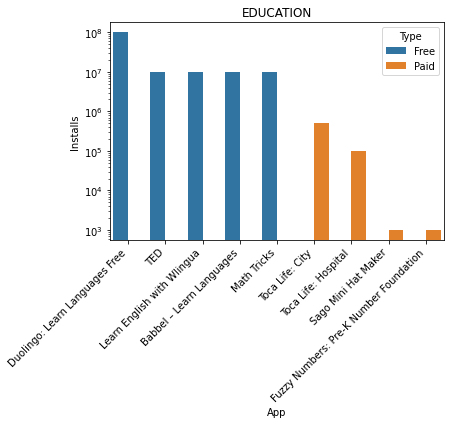

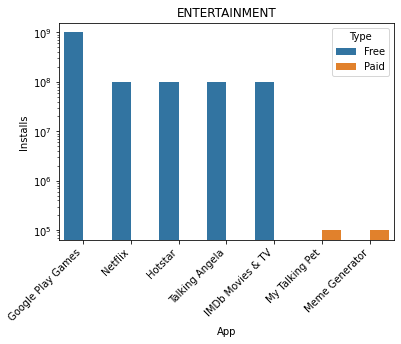

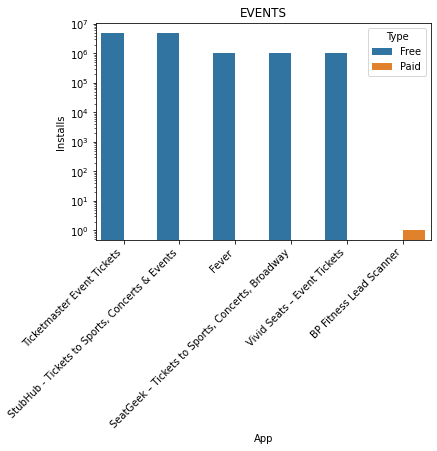

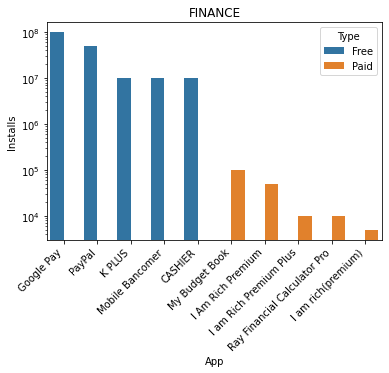

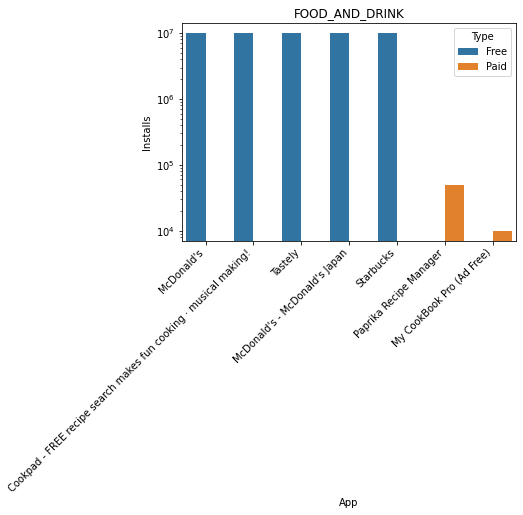

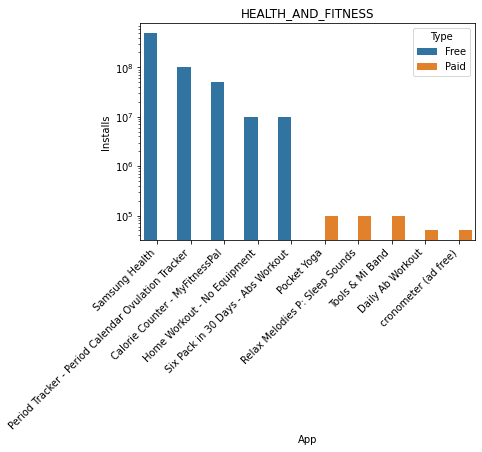

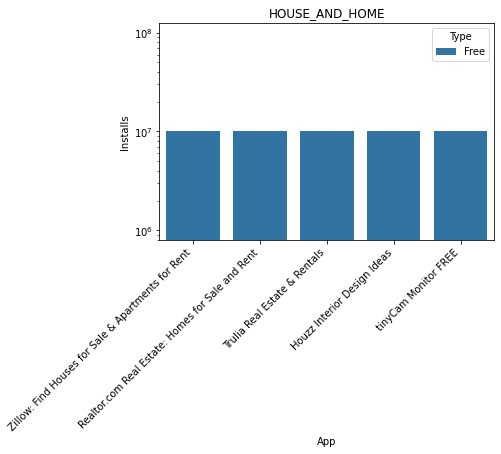

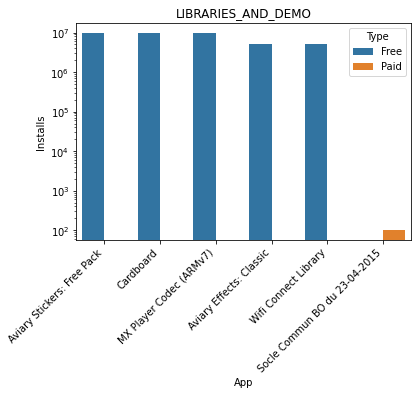

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


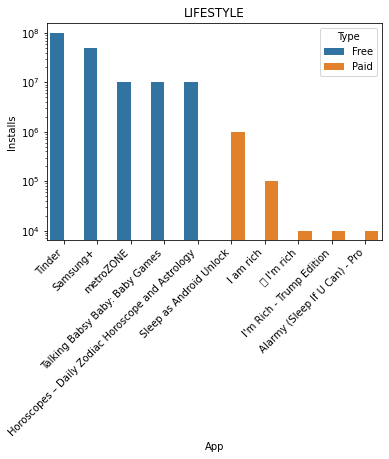

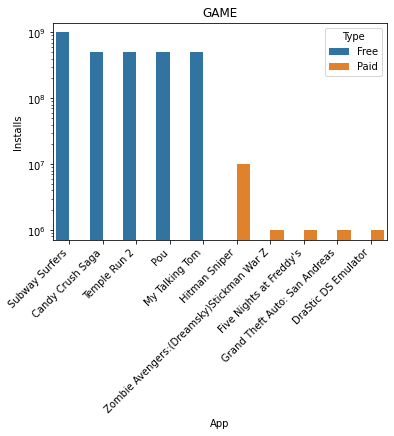

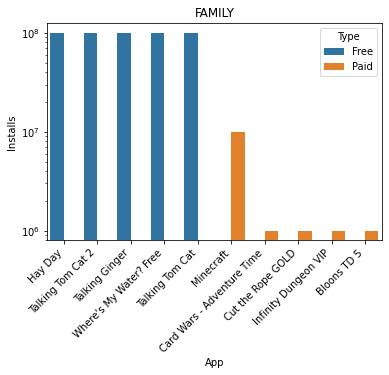

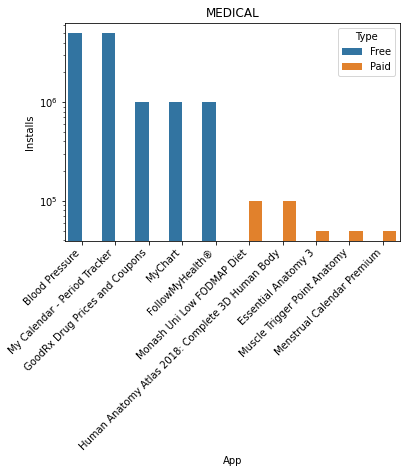

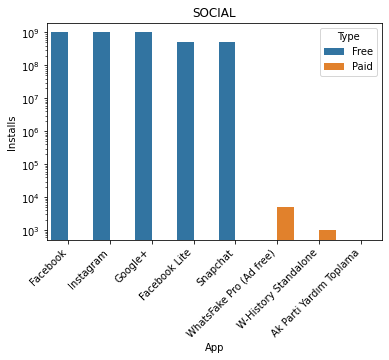

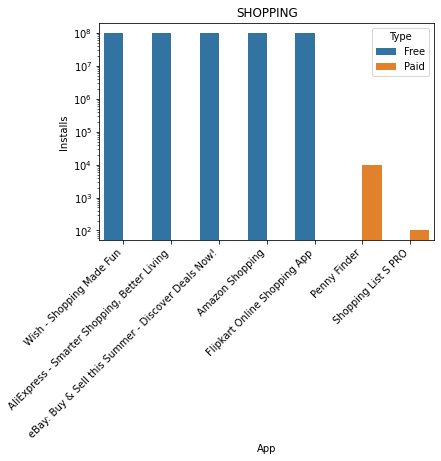

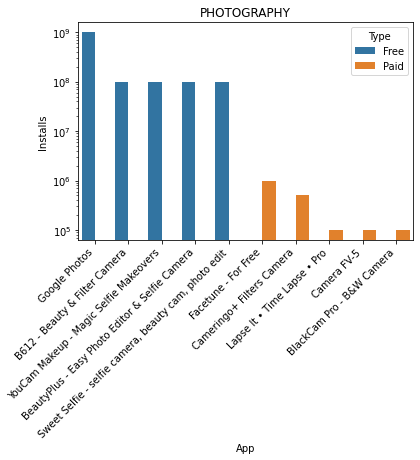

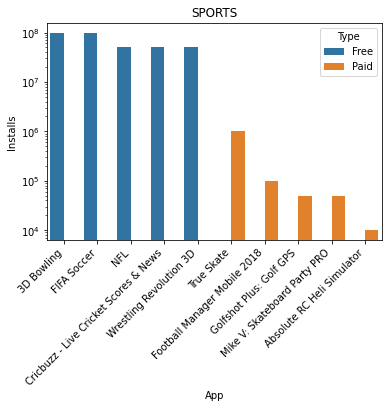

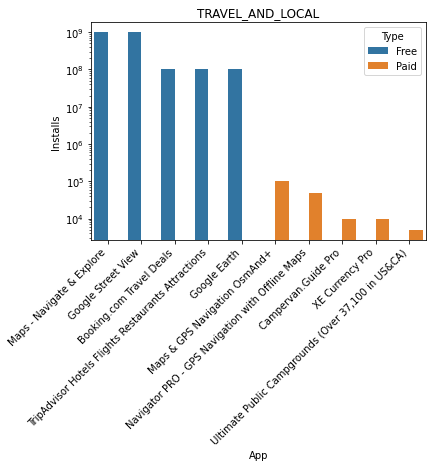

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


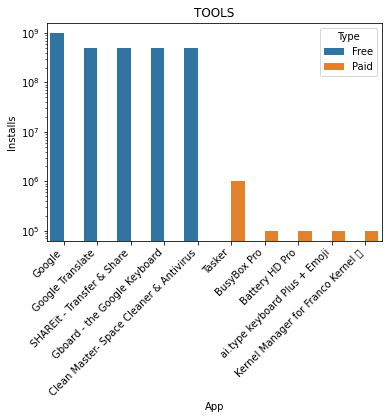

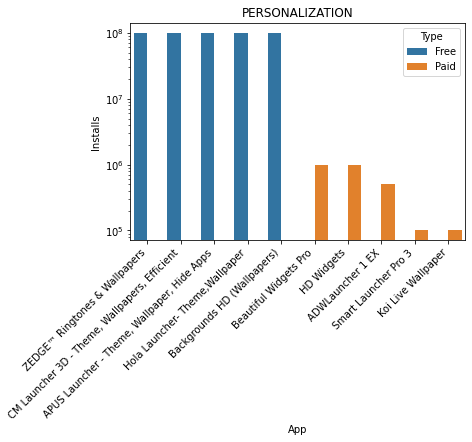

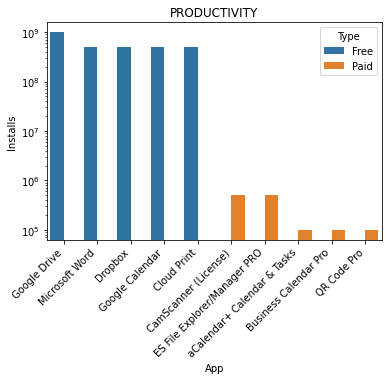

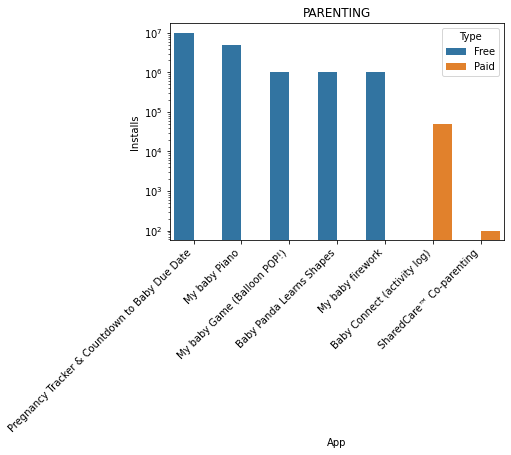

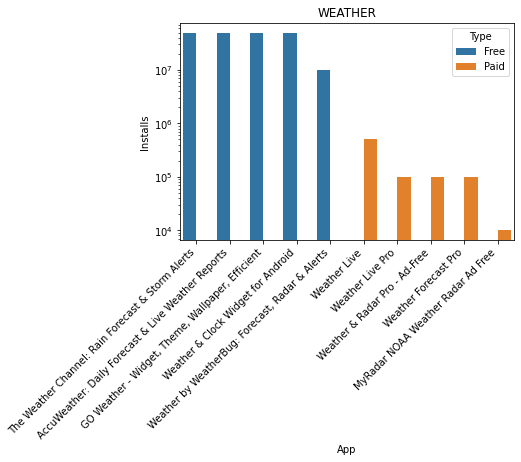

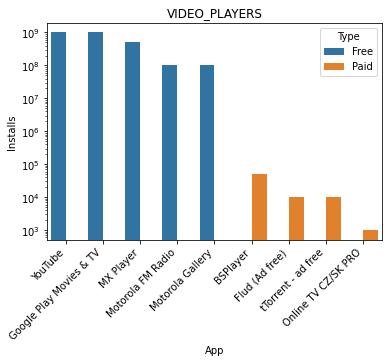

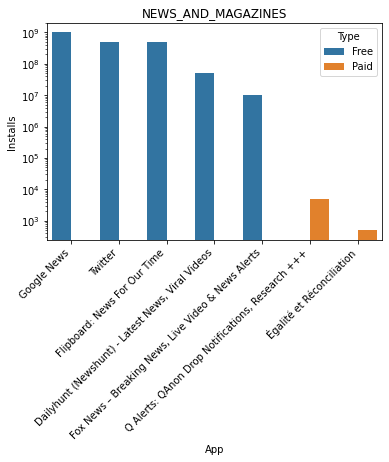

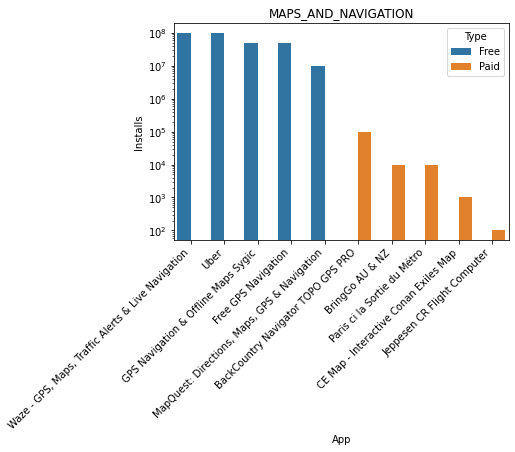

In [ ]:
# PLot 5top apps in each Category for Free and for Paid apps
for categ in data.Category.unique() :

  dataij = test.loc[ test['Category'] == categ]

  sns.barplot(data=dataij, x='App', y='Installs', hue = 'Type')
  plt.yscale('log')
  plt.xticks(rotation=45, ha='right')
  plt.title(categ)
  plt.show()
    

=====================================================================================